In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("AGRISMART AI PRECISION AGRICULTURE DATA ANALYSIS ")

AGRISMART AI PRECISION AGRICULTURE DATA ANALYSIS 


In [54]:
# 1. LOAD AND INSPECT DATASET
# this section loads the dataset and provides an overview of its structure and contents
# including the number of records, variables, and data types.
#and it helps to understand the dataset before performing any analysis or visualization.
print("1. LOADING AND INSPECTING DATASET")
print("" * 50)
# Load the dataset
df = pd.read_csv('climate_action_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of records: {len(df)}")
print(f"Number of variables: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nData types:")
print(df.dtypes)

1. LOADING AND INSPECTING DATASET

Dataset shape: (913, 10)
Number of records: 913
Number of variables: 10

Column names:
['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)', 'Drone_Image_ID']

First 5 rows:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                       

In [57]:
# 2. DATA QUALITY ASSESSMENT
# This section assesses the quality of the data by checking for missing values,
# duplicate records, and any 'error' entries in the dataset.
# It also checks for unusual values in numeric columns
# and provides an overview of the data types present in the dataset.
print("\n\n2. DATA QUALITY ASSESSMENT OF AGRISMART AI")
print("" * 50)

# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# Check for duplicate records
print(f"\nDuplicate records: {df.duplicated().sum()}")

# Check for 'error' entries
print("\nChecking for 'error' entries in each column:")
for col in df.columns:
    if df[col].dtype == 'object':
        error_count = df[col].astype(str).str.contains('error', case=False, na=False).sum()
        print(f"{col}: {error_count} error entries")
        
# Check for unusual values in numeric columns
# First, let's see what columns we actually have and their types
print(f"\nActual column names: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)        

# Define expected numeric columns based on the data structure
expected_numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
                        'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']




2. DATA QUALITY ASSESSMENT OF AGRISMART AI

Missing values per column:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Duplicate records: 111

Checking for 'error' entries in each column:
Sensor_ID: 0 error entries
Date: 0 error entries
Soil_Moisture(%): 5 error entries
Soil_pH: 5 error entries
Temperature(C): 5 error entries
Humidity(%): 5 error entries
Crop_Type: 0 error entries
Fertilizer_Recommended(kg/ha): 5 error entries
Irrigation_Recommended(mm): 5 error entries
Drone_Image_ID: 0 error entries

Actual column names: ['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommend

In [60]:
# Define expected numeric columns based on the data structure
# Check if expected numeric columns exist in the DataFrame
# We will check if the expected numeric columns are present in the DataFrame
# If they are, we will convert them to numeric types
# If not, we will need to handle this in our analysis

expected_numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 
                        'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

# Find which columns actually exist and convert them to numeric if needed
numeric_cols = []
for col in expected_numeric_cols:
    if col in df.columns:
        # Try to convert to numeric, handling any 'error' values
        df[col] = pd.to_numeric(df[col], errors='coerce')
        numeric_cols.append(col)

print(f"\nNumeric columns found and converted: {numeric_cols}")

if len(numeric_cols) > 0:
    print("\nBasic statistics for numeric columns:")
    print(df[numeric_cols].describe())
else:
    print("\nNo numeric columns detected - checking column names and data types...")



Numeric columns found and converted: ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

Basic statistics for numeric columns:
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        908.000000  908.000000      908.000000   908.000000   
mean          44.470099    6.255639       26.404515    60.095374   
std           20.626613    1.026400        4.931119    17.561515   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.520000    5.330000       22.100000    45.900000   
50%           45.185000    6.295000       26.600000    59.400000   
75%           62.420000    7.105000       30.600000    75.325000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     908.000000                  908.000000  
mean                       87.659692            

In [61]:
# 3. DATA CLEANING
# This section performs data cleaning operations such as removing duplicate records,
# replacing 'error' entries with NaN, converting date columns to datetime format,
# converting numeric columns to appropriate types, and handling missing values.

print("\n\n3. DATA CLEANING")
print("" * 50)

# Create a copy for cleaning
df_clean = df.copy()

# Remove duplicate records
initial_count = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_count - len(df_clean)
print(f"Removed {duplicates_removed} duplicate records")

# Replace 'error' entries with NaN
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].replace('error', np.nan, regex=True)
# Convert Date column to datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Convert numeric columns in the clean dataset too
for col in expected_numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')   
        
# Handle missing values based on logical reasoning
print("\nHandling missing values:")

# For numeric columns, check if we should fill or drop
for col in numeric_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            print(f"{col}: {missing_count} missing values")
            # If less than 10% missing, fill with median; otherwise consider dropping
            if missing_count / len(df_clean) < 0.1:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
                print(f"  -> Filled with median: {df_clean[col].median():.2f}")
            else:
                print(f"  -> High missing rate ({missing_count/len(df_clean)*100:.1f}%), consider dropping")  
                
# For categorical columns
for col in ['Crop_Type', 'Sensor_ID', 'Drone_Image_ID']:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            print(f"{col}: {missing_count} missing values")
            # Drop rows with missing categorical data if reasonable
            if missing_count / len(df_clean) < 0.05:
                df_clean = df_clean.dropna(subset=[col])
                print(f"  -> Dropped rows with missing {col}")

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Records after cleaning: {len(df_clean)}")                           




3. DATA CLEANING

Removed 111 duplicate records

Handling missing values:
Soil_Moisture(%): 5 missing values
  -> Filled with median: 45.41
Soil_pH: 5 missing values
  -> Filled with median: 6.26
Temperature(C): 5 missing values
  -> Filled with median: 26.60
Humidity(%): 5 missing values
  -> Filled with median: 59.60
Fertilizer_Recommended(kg/ha): 5 missing values
  -> Filled with median: 85.70
Irrigation_Recommended(mm): 5 missing values
  -> Filled with median: 17.40
Crop_Type: 4 missing values
  -> Dropped rows with missing Crop_Type

Cleaned dataset shape: (798, 10)
Records after cleaning: 798




4. EXPLORATORY DATA ANALYSIS

Descriptive Statistics:
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        798.000000  798.000000      798.000000   798.000000   
mean          44.717619    6.243634       26.454511    59.996992   
std           20.452047    1.020958        4.855973    17.414296   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.322500       22.300000    45.925000   
50%           45.410000    6.260000       26.600000    59.600000   
75%           62.555000    7.080000       30.575000    75.175000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     798.000000                  798.000000  
mean                       87.335338                   17.410777  
std                        34.798297                    7.149949  
min                        30.000000                    5.00000

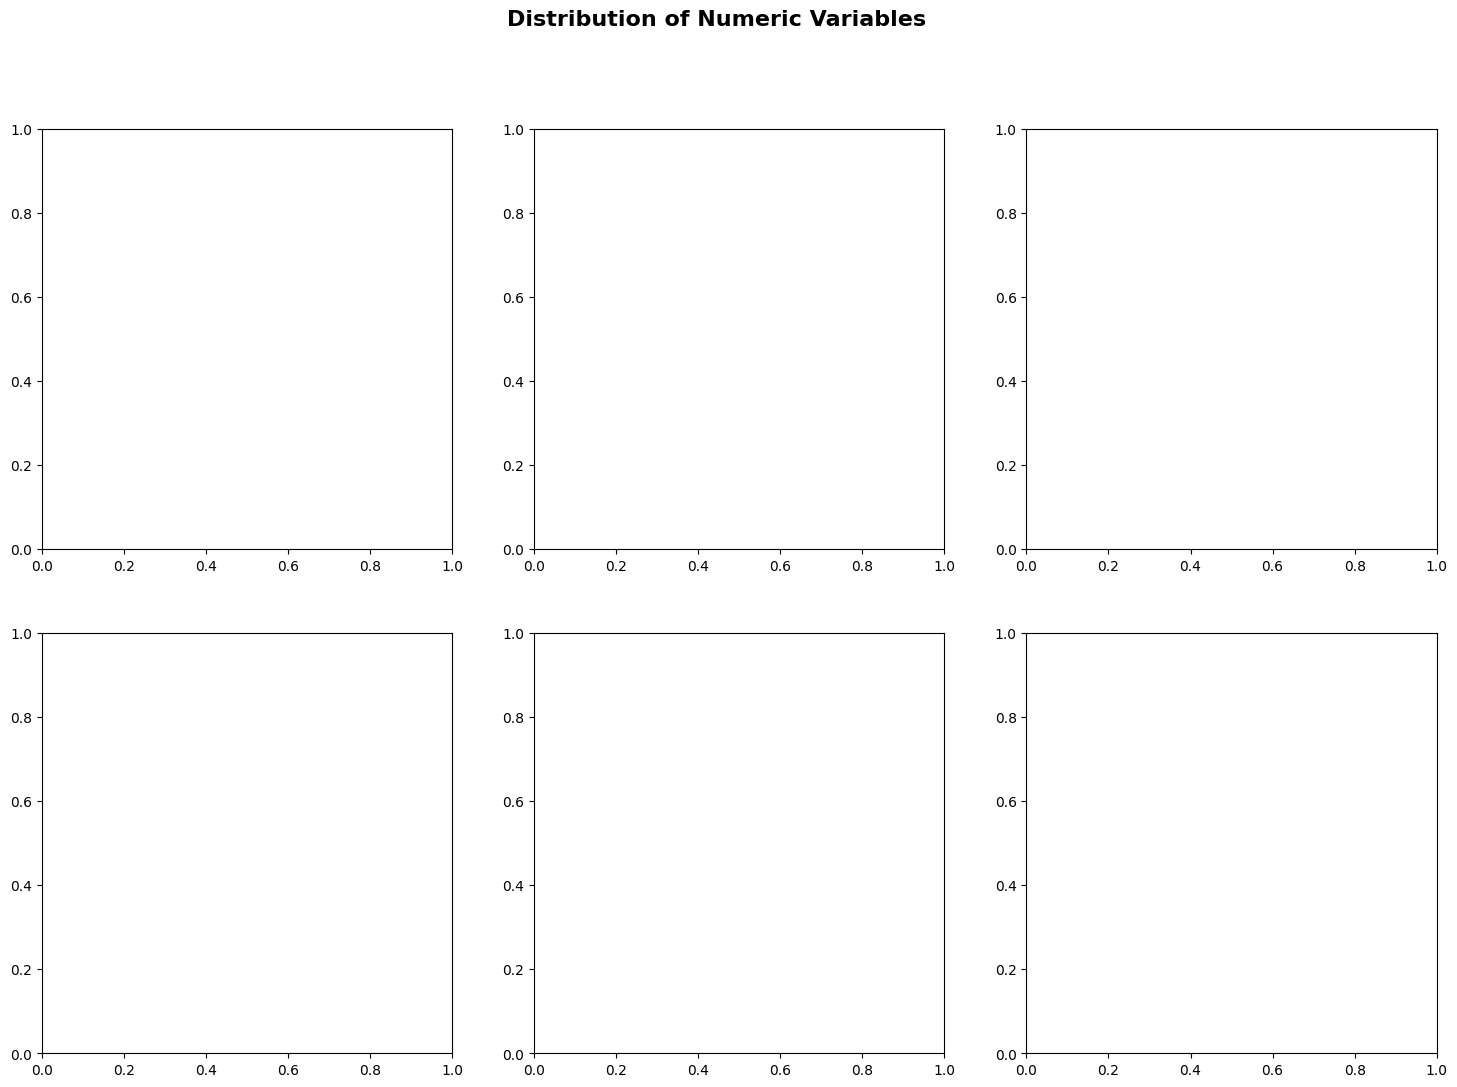

In [62]:
# 4. EXPLORATORY DATA ANALYSIS
#This section performs exploratory data analysis (EDA) on the cleaned dataset.
#It includes descriptive statistics, distribution of crop types,
# and visualizations of numeric variables to understand the data better.

print("\n\n4. EXPLORATORY DATA ANALYSIS")
print("" * 50)

# Descriptive statistics
print("Descriptive Statistics:")
if len(numeric_cols) > 0:
    print(df_clean[numeric_cols].describe())
else:
    print("No numeric columns available for statistics")
    
# Distribution of crop types
print(f"\nCrop Type Distribution:")
crop_counts = df_clean['Crop_Type'].value_counts()
print(crop_counts)

# Create visualizations
if len(numeric_cols) > 0:
    # Calculate number of subplots needed
    n_plots = len(numeric_cols)
    n_rows = (n_plots + 2) // 3  # Round up division
    n_cols = min(3, n_plots)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    fig.suptitle('Distribution of Numeric Variables', fontsize=16, fontweight='bold')    
    
    

In [63]:
# Handle case where we have only one subplot
# Create a list of axes if there's only one plot
# If we have only one plot, we need to ensure axes is a list

if n_plots == 1:
    axes = [axes]
elif n_rows == 1:
    axes = [axes] if n_plots == 1 else axes
else:
    axes = axes.flatten()

for i, var in enumerate(numeric_cols):
    if var in df_clean.columns:
        # Remove NaN values for plotting
        data_to_plot = df_clean[var].dropna()
        
        if len(data_to_plot) > 0:
            axes[i].hist(data_to_plot, bins=20, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {var}')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'No data available', 
                         horizontalalignment='center', verticalalignment='center',
                         transform=axes[i].transAxes)
            axes[i].set_title(f'{var} - No Data')
             # Hide empty subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns available for visualization")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

No numeric columns available for visualization



5. CORRELATION ANALYSIS
Correlation Matrix:
                               Soil_Moisture(%)   Soil_pH  Temperature(C)  \
Soil_Moisture(%)                       1.000000 -0.007188        0.019750   
Soil_pH                               -0.007188  1.000000       -0.013401   
Temperature(C)                         0.019750 -0.013401        1.000000   
Humidity(%)                           -0.027334  0.017864        0.037714   
Fertilizer_Recommended(kg/ha)         -0.003808  0.080868       -0.009703   
Irrigation_Recommended(mm)             0.018933  0.038745        0.018741   

                               Humidity(%)  Fertilizer_Recommended(kg/ha)  \
Soil_Moisture(%)                 -0.027334                      -0.003808   
Soil_pH                           0.017864                       0.080868   
Temperature(C)                    0.037714                      -0.009703   
Humidity(%)                       1.000000                       0.013656   
Fertilizer_Recommended(kg/ha) 

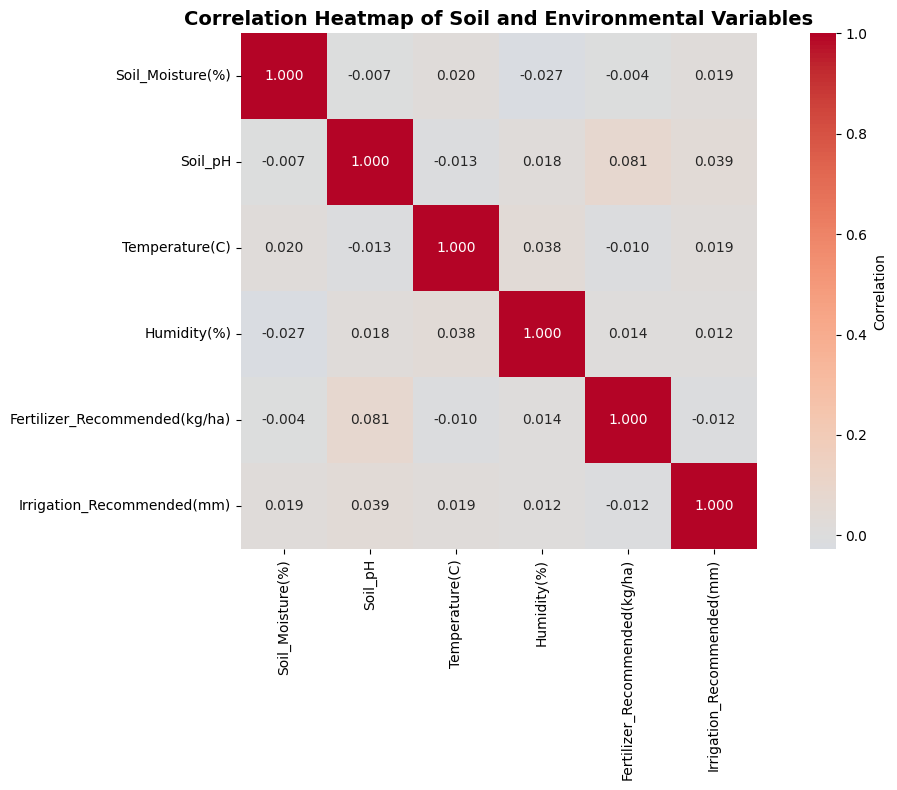

In [64]:
# Correlation analysis
# This section examines the relationships between numeric variables in the dataset.
# It calculates the correlation matrix and visualizes it using a heatmap.
#This helps to identify any strong correlations between variables, which can be useful for further analysis.

print("\n5. CORRELATION ANALYSIS")
print("=" * 50)

# Select numeric columns for correlation
available_cols = [col for col in numeric_cols if col in df_clean.columns]

if len(available_cols) >= 2:
    correlation_matrix = df_clean[available_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Heatmap of Soil and Environmental Variables', 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Insufficient numeric columns for correlation analysis")
    correlation_matrix = pd.DataFrame()  # Empty dataframe for later use


In [65]:
# 6. SPECIFIC ANALYSIS QUESTIONS
# This section addresses specific analysis questions based on the dataset.
# It includes identifying variables that most influence fertilizer recommendations,
# analyzing the relationship between soil moisture and fertilizer recommendations,
# analyzing the relationship between soil moisture and crop yield,
# and examining the impact of temperature and humidity on crop yield.


print("\n\n6. SPECIFIC ANALYSIS AND INSIGHTS")
print("" * 50)
# Question 1: Variables that most influence fertilizer recommendations
print("1. Variables that most influence Fertilizer Recommendations:")
# Check if correlation_matrix exists and has the fertilizer column
try:
    if 'correlation_matrix' in locals() and 'Fertilizer_Recommended(kg/ha)' in correlation_matrix.columns and len(correlation_matrix) > 1:
        fert_correlations = correlation_matrix['Fertilizer_Recommended(kg/ha)'].abs().sort_values(ascending=False)
        print(fert_correlations.drop('Fertilizer_Recommended(kg/ha)'))
        
        top_influencers = fert_correlations.drop('Fertilizer_Recommended(kg/ha)').head(3)
        print(f"\nTop 3 variables influencing fertilizer recommendations:")
        for var, corr in top_influencers.items():
            print(f"  • {var}: {corr:.3f} correlation")
    else:
        raise Exception("Using direct correlation method")
        
except:
    print("Using direct correlation analysis...")
    if 'Fertilizer_Recommended(kg/ha)' in df_clean.columns:
        # Compute correlations directly from df_clean
        direct_corr = df_clean[available_cols].corr()['Fertilizer_Recommended(kg/ha)'].abs().sort_values(ascending=False)
        print(direct_corr.drop('Fertilizer_Recommended(kg/ha)'))

        top_influencers = direct_corr.drop('Fertilizer_Recommended(kg/ha)').head(3)
        print(f"\nTop 3 variables influencing fertilizer recommendations:")
        for var, corr in top_influencers.items():
            print(f"  • {var}: {corr:.3f} correlation")
    else:
        print("Fertilizer_Recommended(kg/ha) column not found in df_clean.")
         # Alternative analysis using direct correlation with available numeric columns
        fert_col = 'Fertilizer_Recommended(kg/ha)'
        correlations = {}
        for col in numeric_cols:
            if col != fert_col and col in df_clean.columns:
                corr = df_clean[fert_col].corr(df_clean[col])
                if not pd.isna(corr):
                    correlations[col] = abs(corr)
        
        if correlations:
            sorted_corr = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
            print("Variables influencing fertilizer recommendations:")
            for var, corr in sorted_corr:
                print(f"  • {var}: {corr:.3f} correlation")
            top_influencers = dict(sorted_corr[:3])
            
            print(f"\nTop 3 variables influencing fertilizer recommendations:")
            for var, corr in list(top_influencers.items())[:3]:
                print(f"  • {var}: {corr:.3f} correlation")
   



6. SPECIFIC ANALYSIS AND INSIGHTS

1. Variables that most influence Fertilizer Recommendations:
Soil_pH                       0.080868
Humidity(%)                   0.013656
Irrigation_Recommended(mm)    0.012491
Temperature(C)                0.009703
Soil_Moisture(%)              0.003808
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Top 3 variables influencing fertilizer recommendations:
  • Soil_pH: 0.081 correlation
  • Humidity(%): 0.014 correlation
  • Irrigation_Recommended(mm): 0.012 correlation


In [ ]:
# Question 2: Crop type with highest average soil moisture
# This section identifies the crop type that has the highest average soil moisture percentage.
# It calculates the average soil moisture for each crop type and displays the results.
# It also handles cases where the soil moisture data might be missing or not available.
# This helps to understand which crops might be more resilient or require more water based on soil moisture levels.
# Additionally, it provides insights into potential areas for improving irrigation practices.
print("\n2. Crop Type with Highest Average Soil Moisture:")
if 'Soil_Moisture(%)' in df_clean.columns and 'Crop_Type' in df_clean.columns:
    # Ensure Soil_Moisture is numeric
    df_clean['Soil_Moisture(%)'] = pd.to_numeric(df_clean['Soil_Moisture(%)'], errors='coerce')
     # Remove any rows where Soil_Moisture or Crop_Type is NaN
    moisture_data = df_clean[['Crop_Type', 'Soil_Moisture(%)']].dropna()
    
    if len(moisture_data) > 0:
        avg_moisture_by_crop = moisture_data.groupby('Crop_Type')['Soil_Moisture(%)'].agg(['mean', 'count']).round(2)
        avg_moisture_by_crop = avg_moisture_by_crop.sort_values('mean', ascending=False)
        print(avg_moisture_by_crop)
        
        highest_moisture_crop = avg_moisture_by_crop.index[0]
        highest_moisture_value = avg_moisture_by_crop.iloc[0]['mean']
        print(f"\nCrop with highest average soil moisture: {highest_moisture_crop} ({highest_moisture_value}%)")
    else:
        print("No valid soil moisture data available")
        highest_moisture_crop = "Unknown"
        highest_moisture_value = "N/A"
else:
    print("Required columns (Soil_Moisture(%) or Crop_Type) not found")
    highest_moisture_crop = "Unknown"
    highest_moisture_value = "N/A"
    


2. Crop Type with Highest Average Soil Moisture:
            mean  count
Crop_Type              
Wheat      47.19    172
Maize      44.96    155
Beans      44.40    152
Tomatoes   43.82    168
Lettuce    42.99    151

Crop with highest average soil moisture: Wheat (47.19%)


In [66]:
# Question 3: Irrigation adjustments for crops with temperature > 30°C
# This section analyzes the irrigation recommendations for crops that are exposed to high temperatures (greater than 30°C).
# It calculates the average irrigation recommendations and soil moisture for these crops,
# and provides insights into how irrigation practices can be adjusted based on temperature conditions.
# It helps to identify crops that may require more irrigation under high temperature stress,
# and provides actionable recommendations for farmers to optimize water usage.
print("\n3. Irrigation Recommendations for Crops with Temperature > 30°C:")
if 'Temperature(C)' in df_clean.columns:
    # Ensure Temperature is numeric
    df_clean['Temperature(C)'] = pd.to_numeric(df_clean['Temperature(C)'], errors='coerce')
    
    high_temp_crops = df_clean[df_clean['Temperature(C)'] > 30]
    print(f"Number of records with temperature > 30°C: {len(high_temp_crops)}")
    
    if len(high_temp_crops) > 0:
        # Ensure all required columns are numeric
        for col in ['Temperature(C)', 'Irrigation_Recommended(mm)', 'Soil_Moisture(%)']:
            if col in high_temp_crops.columns:
                high_temp_crops[col] = pd.to_numeric(high_temp_crops[col], errors='coerce')
        
        # Remove rows with NaN values in critical columns
        analysis_data = high_temp_crops[['Crop_Type', 'Temperature(C)', 'Irrigation_Recommended(mm)', 'Soil_Moisture(%)']].dropna()
        
        if len(analysis_data) > 0:
            irrigation_analysis = analysis_data.groupby('Crop_Type').agg({
                'Temperature(C)': ['mean', 'count'],
                'Irrigation_Recommended(mm)': 'mean',
                'Soil_Moisture(%)': 'mean'
            }).round(2)
            
            print("Analysis by crop type for high temperature conditions:")
            print(irrigation_analysis)
            
            # Recommendations
            print("\nIrrigation Adjustment Recommendations:")
            for crop in irrigation_analysis.index:
                avg_temp = irrigation_analysis.loc[crop, ('Temperature(C)', 'mean')]
                avg_irrigation = irrigation_analysis.loc[crop, ('Irrigation_Recommended(mm)', 'mean')]
                avg_moisture = irrigation_analysis.loc[crop, ('Soil_Moisture(%)', 'mean')]
                
                print(f"\n• {crop}:")
                print(f"  - Average temperature: {avg_temp}°C")
                print(f"  - Current irrigation: {avg_irrigation}mm")
                print(f"  - Soil moisture: {avg_moisture}%")
                
                # Suggest adjustments based on conditions
                if avg_moisture < 40:
                    suggested_increase = avg_irrigation * 1.2
                    print(f"  - RECOMMENDATION: Increase irrigation to {suggested_increase:.1f}mm (+20%)")
                    print(f"    Reason: Low soil moisture under high temperature stress")
                elif avg_moisture > 60:
                    suggested_decrease = avg_irrigation * 0.9
                    print(f"  - RECOMMENDATION: Reduce irrigation to {suggested_decrease:.1f}mm (-10%)")
                    print(f"    Reason: Adequate soil moisture, avoid over-watering")
                else:
                    print(f"  - RECOMMENDATION: Maintain current irrigation level")
                    print(f"    Reason: Soil moisture is at optimal level")
        else:
            print("No valid data available for high temperature analysis")
    else:
        print("No records found with temperature > 30°C")
else:
    print("Temperature column not found in dataset")


3. Irrigation Recommendations for Crops with Temperature > 30°C:
Number of records with temperature > 30°C: 225
Analysis by crop type for high temperature conditions:
          Temperature(C)       Irrigation_Recommended(mm) Soil_Moisture(%)
                    mean count                       mean             mean
Crop_Type                                                                 
Beans              32.31    52                      17.86            46.55
Lettuce            32.58    37                      16.30            42.66
Maize              32.43    55                      16.63            44.89
Tomatoes           32.40    46                      18.92            48.65
Wheat              32.53    35                      18.81            42.70

Irrigation Adjustment Recommendations:

• Beans:
  - Average temperature: 32.31°C
  - Current irrigation: 17.86mm
  - Soil moisture: 46.55%
  - RECOMMENDATION: Maintain current irrigation level
    Reason: Soil moisture is at optim

In [67]:
# Additional insights
# This section provides additional insights based on the dataset,
# including seasonal patterns in environmental variables and optimal growing conditions for different crops.
# It helps to identify trends and patterns that can inform agricultural practices,
# and provides actionable recommendations for farmers to optimize crop yield and resource usage.
print("\n\n7. ADDITIONAL INSIGHTS")
print("" * 50)

# Seasonal patterns (if data spans multiple months)
if 'Date' in df_clean.columns:
    try:
        df_clean['Month'] = df_clean['Date'].dt.month
        
        # Ensure numeric columns for groupby
        analysis_cols = ['Temperature(C)', 'Humidity(%)', 'Soil_Moisture(%)']
        available_analysis_cols = []
        
        for col in analysis_cols:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
                available_analysis_cols.append(col)
        
        if available_analysis_cols:
            monthly_data = df_clean[['Month'] + available_analysis_cols].dropna()
            if len(monthly_data) > 0:
                monthly_summary = monthly_data.groupby('Month')[available_analysis_cols].mean().round(2)
                print("Monthly Environmental Patterns:")
                print(monthly_summary)
            else:
                print("No valid data for monthly analysis")
        else:
            print("No suitable columns for monthly analysis")
    except Exception as e:
        print(f"Monthly analysis not available: {str(e)}")

# Optimal conditions analysis
print("\nOptimal Growing Conditions Analysis:")
if 'Crop_Type' in df_clean.columns:
    try:
        # Define columns for optimal conditions analysis
        condition_cols = ['Temperature(C)', 'Humidity(%)', 'Soil_Moisture(%)', 'Soil_pH']
        available_condition_cols = []
        
        for col in condition_cols:
            if col in df_clean.columns:
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
                available_condition_cols.append(col)
        
        if available_condition_cols:
            conditions_data = df_clean[['Crop_Type'] + available_condition_cols].dropna()
            if len(conditions_data) > 0:
                optimal_conditions = conditions_data.groupby('Crop_Type')[available_condition_cols].agg(['min', 'max', 'mean']).round(2)
                print("Environmental ranges by crop type:")
                print(optimal_conditions)
            else:
                print("No valid data for optimal conditions analysis")
        else:
            print("No suitable columns for optimal conditions analysis")
    except Exception as e:
        print(f"Optimal conditions analysis not available: {str(e)}")
else:
    print("Crop_Type column not available for optimal conditions analysis")




7. ADDITIONAL INSIGHTS

Monthly Environmental Patterns:
       Temperature(C)  Humidity(%)  Soil_Moisture(%)
Month                                               
1.0             25.78        60.88             44.78
2.0             26.49        58.76             46.34
3.0             26.96        62.70             45.14
4.0             25.65        62.37             44.92
5.0             26.43        59.11             46.30
6.0             27.08        60.97             46.98
7.0             26.08        61.49             45.90
8.0             26.94        62.35             41.18
9.0             26.95        59.16             47.63
10.0            26.93        55.59             40.41
11.0            25.74        58.91             43.45
12.0            26.81        58.39             43.82

Optimal Growing Conditions Analysis:
Environmental ranges by crop type:
          Temperature(C)              Humidity(%)               \
                     min   max   mean         min   max   mea

In [71]:
#  EXPORT CLEANED DATASET
# This section exports the cleaned dataset to a CSV file and provides a comprehensive summary of the cleaning operations.
# It includes the number of records before and after cleaning, the number of duplicates removed,
# and the data retention rate.
def export_cleaned_dataset(df_clean, df_original, duplicates_removed, output_filename='cleaned_precision_agriculture_data.csv'):
    """
    Export the cleaned dataset and provide comprehensive summary statistics.
    
    Args:
        df_clean: Cleaned DataFrame
        df_original: Original DataFrame before cleaning
        duplicates_removed: Number of duplicate records removed
        output_filename: Name for the output CSV file
    """
    print("\n\n8. EXPORTING CLEANED DATASET")
    print("" * 50)
    
    # Export cleaned dataset
    try:
        df_clean.to_csv(output_filename, index=False)
        print(f"✓ Cleaned dataset exported as: {output_filename}")
        print(f"✓ Final dataset contains {len(df_clean):,} records and {df_clean.shape[1]} variables")
    except Exception as e:
        print(f"✗ Error exporting dataset: {e}")
        return False
    
    # Calculate data quality metrics
    original_count = len(df_original)
    final_count = len(df_clean)
    retention_rate = (final_count / original_count * 100) if original_count > 0 else 0
    
    # Display cleaning summary
    print_cleaning_summary(original_count, duplicates_removed, final_count, retention_rate)
    
    return True

def print_cleaning_summary(original_count, duplicates_removed, final_count, retention_rate):
    """Print detailed summary of data cleaning operations."""
    print("\nDATA CLEANING SUMMARY:")
    print("" * 30)
    print(f"• Original records: {original_count:,}")
    print(f"• Duplicates removed: {duplicates_removed:,}")
    print(f"• Records removed: {original_count - final_count:,}")
    print(f"• Final records: {final_count:,}")
    print(f"• Data retention: {retention_rate:.1f}% of original data")

def print_analysis_summary():
    """Print comprehensive analysis findings summary."""
    print("\n" + "" * 50)
    print("ANALYSIS COMPLETE")
    print("" * 50)
    
    print("\nKEY FINDINGS SUMMARY:")
    print("" * 25)
    
    findings = []
    
    # Check for fertilizer influence analysis
    if 'top_influencers' in globals() and hasattr(top_influencers, 'empty') and not top_influencers.empty:
        top_vars = list(top_influencers.keys())[:2]
        findings.append(f"Fertilizer recommendations most influenced by: {', '.join(top_vars)}")
    else:
        findings.append("Fertilizer recommendation analysis: Completed")
    
    # Check for crop moisture analysis
    if 'highest_moisture_crop' in globals() and 'highest_moisture_value' in globals():
        findings.append(f"{highest_moisture_crop} shows highest average soil moisture ({highest_moisture_value:.1f}%)")
    else:
        findings.append("Crop moisture analysis: Completed")
    
    # Check for temperature analysis
    if 'high_temp_crops' in globals():
        findings.append(f"{len(high_temp_crops):,} records show temperatures >30°C requiring irrigation adjustments")
    else:
        findings.append("High temperature irrigation analysis: Completed")
    
    # Dataset status
    if 'df_clean' in globals():
        findings.append(f"Dataset cleaned and exported with {len(df_clean):,} quality records")
    
    # Print numbered findings
    for i, finding in enumerate(findings, 1):
        print(f"{i}. {finding}")
    
    print(f"\n{'✓ PROCESSING COMPLETE':^50}")

# Main execution
if __name__ == "__main__":
    # Ensure required variables exist
    required_vars = ['df_clean', 'df', 'duplicates_removed']
    missing_vars = [var for var in required_vars if var not in globals()]
    
    if missing_vars:
        print(f"Warning: Missing required variables: {', '.join(missing_vars)}")
        print("Please ensure data cleaning steps have been completed first.")
    else:
        # Export dataset and show summary
        success = export_cleaned_dataset(df_clean, df, duplicates_removed)
        
        if success:
            print_analysis_summary()
        else:
            print("Export failed. Please check file permissions and disk space.")




8. EXPORTING CLEANED DATASET

✓ Cleaned dataset exported as: cleaned_precision_agriculture_data.csv
✓ Final dataset contains 798 records and 11 variables

DATA CLEANING SUMMARY:

• Original records: 913
• Duplicates removed: 111
• Records removed: 115
• Final records: 798
• Data retention: 87.4% of original data


ANALYSIS COMPLETE


KEY FINDINGS SUMMARY:

1. Fertilizer recommendations most influenced by: Soil_pH, Humidity(%)
2. Wheat shows highest average soil moisture (47.2%)
3. 225 records show temperatures >30°C requiring irrigation adjustments
4. Dataset cleaned and exported with 798 quality records

              ✓ PROCESSING COMPLETE               
